<a href="https://colab.research.google.com/github/stevenkhwun/Colab/blob/main/BasicOperation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook contains some basic commands in using Colab and is based on the article from the website https://www.jcchouinard.com/google-colab-with-python/.

# Display installed packages

Colab has pre-installed many packages. You can get a complete list of pr-installed packages by the following command.
```python
# Check the full list of packages
!pip list -v
```

The code has not been executed since it will give a very long list of packages. Instead, you can display a list of installed packages contains specific characters by using `grep`.

In [1]:
# Search through the files for "tensorflow" using "grep"
!pip list -v | grep tensorflow

tensorflow                       2.15.0                /usr/local/lib/python3.10/dist-packages pip
tensorflow-datasets              4.9.6                 /usr/local/lib/python3.10/dist-packages pip
tensorflow-estimator             2.15.0                /usr/local/lib/python3.10/dist-packages pip
tensorflow-gcs-config            2.15.0                /usr/local/lib/python3.10/dist-packages pip
tensorflow-hub                   0.16.1                /usr/local/lib/python3.10/dist-packages pip
tensorflow-io-gcs-filesystem     0.37.0                /usr/local/lib/python3.10/dist-packages pip
tensorflow-metadata              1.15.0                /usr/local/lib/python3.10/dist-packages pip
tensorflow-probability           0.23.0                /usr/local/lib/python3.10/dist-packages pip


The above code will return nothing if the target package has not been found.

# Install packages

To install a package, simple execute the following code.

In [3]:
# Install the package "wquantiles"
!pip install wquantiles

In [4]:
# Search for the package "wquantiles"
!pip list -v | grep wquantiles

wquantiles                       0.6                   /usr/local/lib/python3.10/dist-packages pip


# Import packages

In [5]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

#Read data from the internet

In [6]:
STATE_CSV = "https://raw.githubusercontent.com/gedeck/practical-statistics-for-data-scientists/master/data/state.csv"

In [7]:
# Example 1
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [8]:
# Example 2
url = "https://github.com/stevenkhwun/EconometricsUsingR/raw/main/Data/EAWE21.csv"
df1 = pd.read_csv(url)
df1

,ID,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,POVRAT97,HHBMBF,HHBMOF,...,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC,EXP
0,8824,0,1,1980,31,29.0,NaN,NaN,1,0,...,1,0,0,0,0,0,1,0,0,12.730770
1,2926,0,1,1982,29,19.0,61900.0,490.0,1,0,...,0,1,0,0,0,1,0,0,0,10.673080
2,1817,0,1,1983,28,29.0,47015.0,251.0,1,0,...,0,0,1,0,0,1,0,0,0,3.000000
3,4813,0,1,1982,29,31.0,112800.0,893.0,1,0,...,1,0,0,0,0,1,0,0,0,6.903846
4,5724,0,1,1981,30,21.0,34700.0,275.0,0,0,...,0,0,1,0,0,1,0,0,0,6.826923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6175,1,0,1982,29,20.0,48200.0,303.0,0,1,...,0,0,1,0,0,0,1,0,0,3.692308
496,2059,1,0,1980,31,23.0,135500.0,646.0,1,0,...,0,0,1,0,0,1,0,0,0,7.634615
497,1531,1,0,1983,28,34.0,149250.0,938.0,1,0,...,0,0,0,1,0,1,0,0,0,5.557693
498,901,1,0,1984,27,25.0,70000.0,374.0,1,0,...,0,0,0,1,0,0,1,0,0,5.769231


In [9]:
k = [1, 2, 3, 4, 5]
k

[1, 2, 3, 4, 5]

In [10]:
import statistics as st

In [11]:
st.mean(k)

3

In [12]:
df1['AGE'].mean()

28.932

In [13]:
st.mean(df1['AGE'])

28.932

In [14]:
import seaborn as sns
sns.set_theme(style='darkgrid')

In [15]:
# Load an example dataset with long-form data
fmri = sns.load_dataset('fmri')

<Axes: xlabel='timepoint', ylabel='signal'>

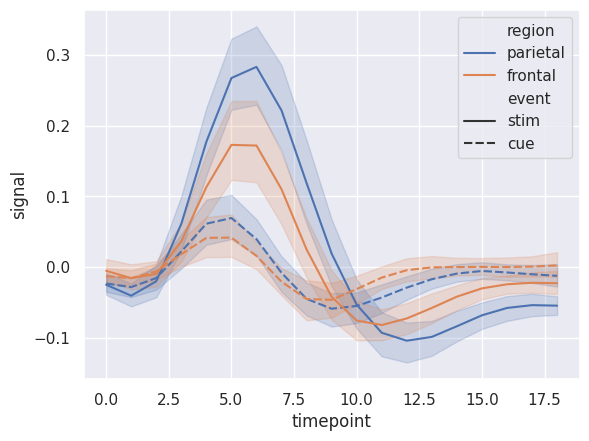

In [16]:
# Plot the responses for different events and regions
sns.lineplot(x='timepoint', y='signal',
             hue='region', style='event',
             data=fmri)